<a href="https://colab.research.google.com/github/nguyenthanh222/phantichdulieu/blob/main/Lab04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
datatitanic = pd.read_csv("https://raw.githubusercontent.com/huynhhoc/phantichdulieu/main/Data/titanic_disaster.csv")

In [2]:
datatitanic.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
5      0            330877   8.4583   NaN        Q  
6      0             17463  51.8625   E46        S  
7      1            349909  21.0750   NaN        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C

Thống kê dữ liệu thiếu trên các biến số và trực quan hóa dữ liệu thiếu bằng biểu đồ (Heat map). Hãy cho nhận xét về tình trạng thiếu dữ liệu Age, Cabin và Embarked

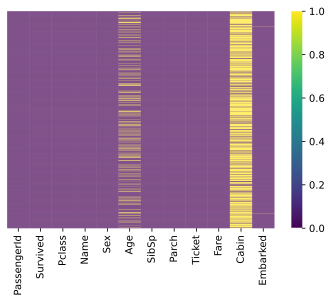

In [3]:

import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sns.heatmap(datatitanic.isna(),
            yticklabels =False,
            cbar =True,
            cmap ='viridis')

Xử lý tên cột tên Name, tách ra làm 2 cột: firstName và secondName.

In [4]:
datatitanic[['Firstname', 'Lastname']]=datatitanic['Name'].str.split(',', expand = True)
datatitanic.head(10)


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  Firstname  \
0      0         A/5 21171   7.2500   NaN        S     Braund   
1      0          PC 17599  71.2833   C85        C    Cumings   
2      0  STON/O2. 3101282   7.9250   NaN        S  Heikkinen   
3      0            113803  53.1000  C123        S   Futrelle   
4      0            373450   8.0500   NaN        S      Allen   
5      0            330877   8.4583   NaN        Q      Moran   
6      0             17463  51.8625   E46        S   McCarthy   
7      1            349909  21.0750   NaN        S    Palsson   
8      2            347742  11.1333   NaN        S    Johnson   
9      0            237736  30.0708   NaN        C     Nasser   

                                      Lastname  
0                              Mr. Owen Harris  
1   Mrs. John Bradley (Florence Briggs Thayer)  
2                                  Miss. Laina  
3           Mrs. Jacques Heath (Lily May Peel)  
4                            Mr. William Henry  
5                                    Mr. James  
6                                Mr. Timothy J  
7                        Master. Gosta Leonard  
8     Mrs. Oscar W (Elisabeth Vilhelmina Berg)  
9                  Mrs. Nicholas (Adele Achem)

In [5]:
datatitanic = datatitanic.drop('Name',axis=1)

Xứ lý rút gọn kích thước dữ liệu trên cột Sex như sau: thay thế male  M và female  F

In [6]:
def sex(x_df):
    mapping={'male':'M', 'female':'F'}
    x_df['Sex']=x_df['Sex'].map(mapping)
    return x_df
datatitanic=(datatitanic.pipe(sex))
datatitanic

PassengerId  Survived  Pclass Sex   Age  SibSp  Parch            Ticket  \
0              1         0       3   M  22.0      1      0         A/5 21171   
1              2         1       1   F  38.0      1      0          PC 17599   
2              3         1       3   F  26.0      0      0  STON/O2. 3101282   
3              4         1       1   F  35.0      1      0            113803   
4              5         0       3   M  35.0      0      0            373450   
..           ...       ...     ...  ..   ...    ...    ...               ...   
886          887         0       2   M  27.0      0      0            211536   
887          888         1       1   F  19.0      0      0            112053   
888          889         0       3   F   NaN      1      2        W./C. 6607   
889          890         1       1   M  26.0      0      0            111369   
890          891         0       3   M  32.0      0      0            370376   

        Fare Cabin Embarked  Firstname  \
0     7.2500   NaN        S     Braund   
1    71.2833   C85        C    Cumings   
2     7.9250   NaN        S  Heikkinen   
3    53.1000  C123        S   Futrelle   
4     8.0500   NaN        S      Allen   
..       ...   ...      ...        ...   
886  13.0000   NaN        S   Montvila   
887  30.0000   B42        S     Graham   
888  23.4500   NaN        S   Johnston   
889  30.0000  C148        C       Behr   
890   7.7500   NaN        Q     Dooley   

                                        Lastname  
0                                Mr. Owen Harris  
1     Mrs. John Bradley (Florence Briggs Thayer)  
2                                    Miss. Laina  
3             Mrs. Jacques Heath (Lily May Peel)  
4                              Mr. William Henry  
..                                           ...  
886                                  Rev. Juozas  
887                         Miss. Margaret Edith  
888               Miss. Catherine Helen "Carrie"  
889                              Mr. Karl Howell  
890                                  Mr. Patrick  

[891 rows x 13 columns]

Xử lý dữ liệu thiếu trên biến Age bằng cách thay thế bằng giá trị trung bình tuổi: Hãy đưa ra quyết định dùng giá trị trung bình tuổi toàn bộ hành khách hay theo từng nhóm hạng vé (hạng hành khách: Pclass). Ta tiến hành làm các bước sau
Sử dụng Seaborn để vẽ biểu đồ (Box plot) trực quan dữ liệu để xác định phân phối tuổi trên từng hạng hành khách. Nhận xét về tuổi trung bình giữa các nhóm hành khách. Từ đó đưa ra quyết định cách thay thế giá trị tuổi bị thiếu. 

b. Tiến hành thay thế giá trị Age bị thiếu. Sau đó, hiển thị kết quả dạng bảng và trực quan dữ liệu đã xử lý thiếu cho cột‘Age‘ bằng biểu đồ Heat map.
Sau đó, hiển thị kết quả dạng bảng và trực quan dữ liệu đã xử lý thiếu cho cột‘Age‘ bằng biểu đồ Heat map.

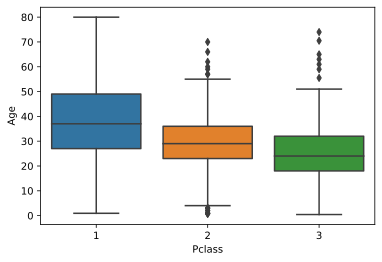

In [7]:
import seaborn as sns
sns.boxplot(y='Age', x='Pclass',  data = datatitanic)

In [8]:
datatitanic["Age"][datatitanic["Pclass"] == 1] = datatitanic["Age"][datatitanic["Pclass"] == 1].fillna(datatitanic["Age"][datatitanic["Pclass"] == 1].median(), inplace = False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
datatitanic["Age"][datatitanic["Pclass"] == 2] = datatitanic["Age"][datatitanic["Pclass"] == 2].fillna(datatitanic["Age"][datatitanic["Pclass"] == 2].median(), inplace = False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
datatitanic["Age"][datatitanic["Pclass"] == 3] = datatitanic["Age"][datatitanic["Pclass"] == 3].fillna(datatitanic["Age"][datatitanic["Pclass"] == 3].median(), inplace = False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sns.heatmap(datatitanic.isna(),
            yticklabels =False,
            cbar =True,
            cmap ='viridis')